<a href="https://colab.research.google.com/github/Neeraj577/Machine_learning/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df1 = pd.read_csv("https://raw.githubusercontent.com/Neeraj577/Machine_learning/main/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df1.head(1)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07


In [8]:
df2= df1.drop(['area_type','society', 'balcony', 'availability'],axis='columns')
df2.shape

(13320, 5)

In [9]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['Bedroom'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head(4)

<ipython-input-13-1883df1fe4d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bedroom'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3


In [14]:
df3['Bedroom'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3[df3.Bedroom>20]

,location,size,total_sqft,bath,price,Bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [18]:
df3[df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [19]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    #a = tokens[0]
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None


In [20]:
df4 = df3.copy()
df4['total_sqft']  = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,Bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
len(df5.location.unique())

1304

In [23]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats =  df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(location_stats[location_stats<=10])

1052

In [25]:
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
len(df5.location.unique())

1293

In [27]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_less_than_10 else x)
len(df5.location.unique())

242

In [30]:
#outlier detection and removal
df5[df5.total_sqft/df5.Bedroom<300].head()


,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [31]:
#Checking total no. of row and col before cleaning
df5.shape

(13246, 7)

In [34]:
#cleaning outliers
df6 = df5[~(df5.total_sqft/df5.Bedroom<300)]
df6.shape

(12502, 7)

In [36]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [38]:
#custom function to remove outliers per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [39]:
df7.head(5)

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


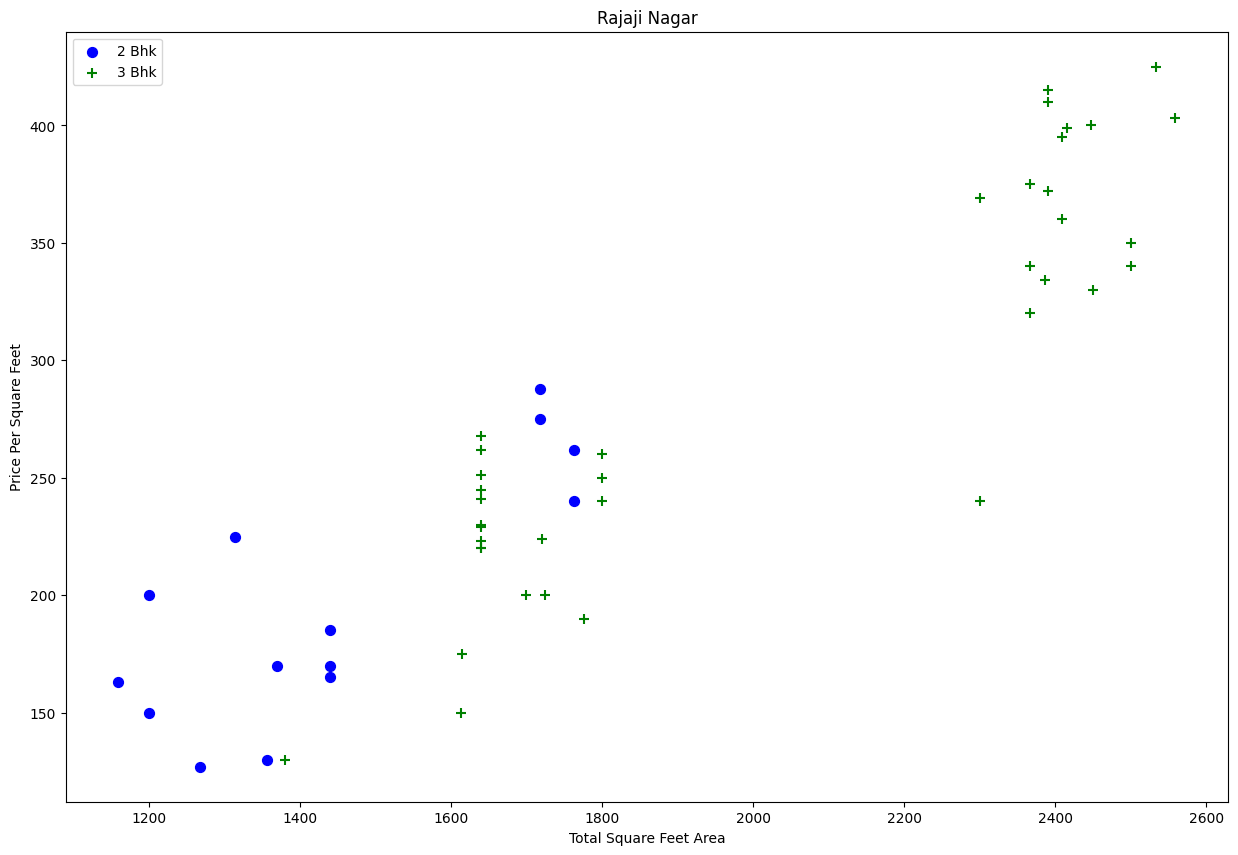

In [43]:
#visualize the datsset using scatter plot
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location==location) & (df.Bedroom==2)]
  bhk3 = df[(df.location==location) & (df.Bedroom==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price,color="blue", label= "2 Bhk", s=50)
  plt.scatter(bhk3.total_sqft, bhk3.price,marker='+', color='green', label="3 Bhk", s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price ")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

In [47]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats= {}
    for Bedroom, bhk_df in location_df.groupby('Bedroom'):
      bhk_stats[Bedroom] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for Bedroom, bhk_df in location_df.groupby('Bedroom'):
      stats = bhk_stats.get(Bedroom-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

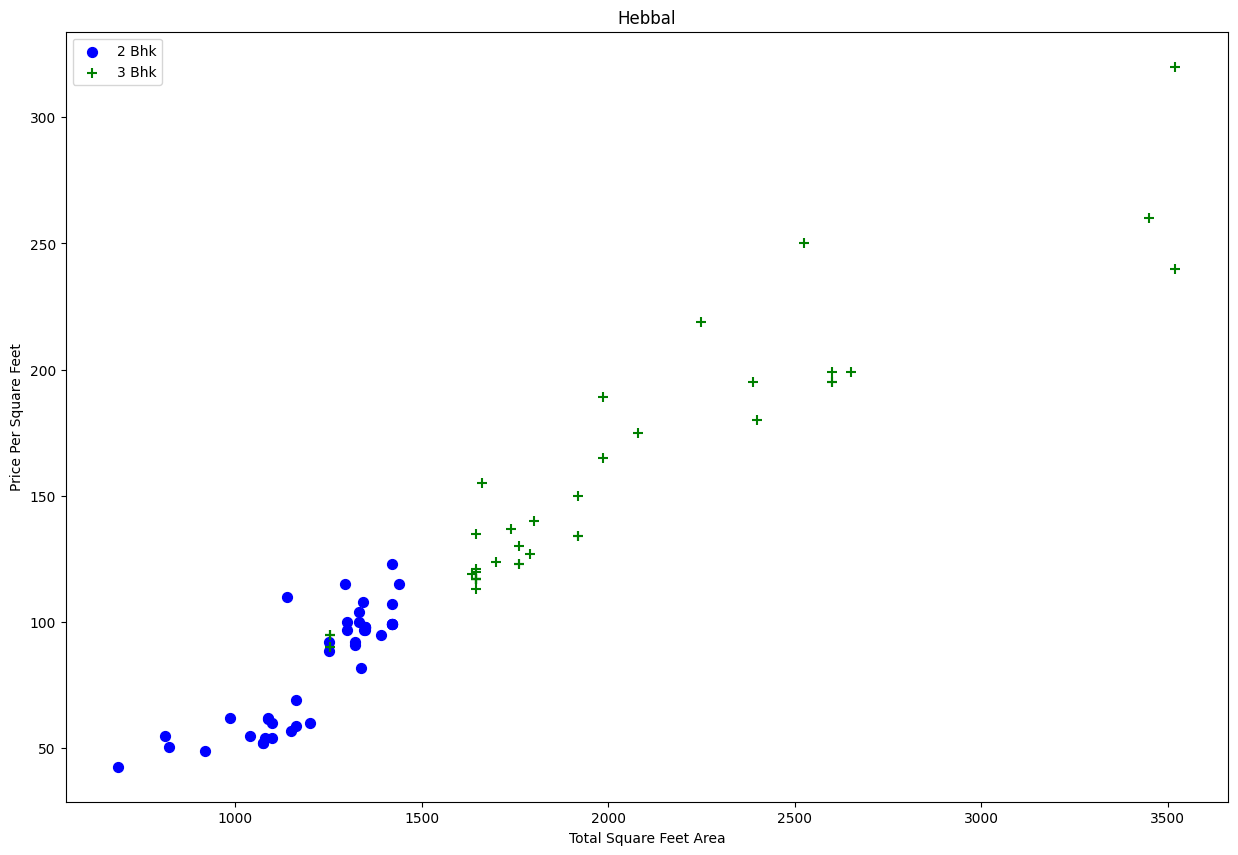

In [49]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'count')

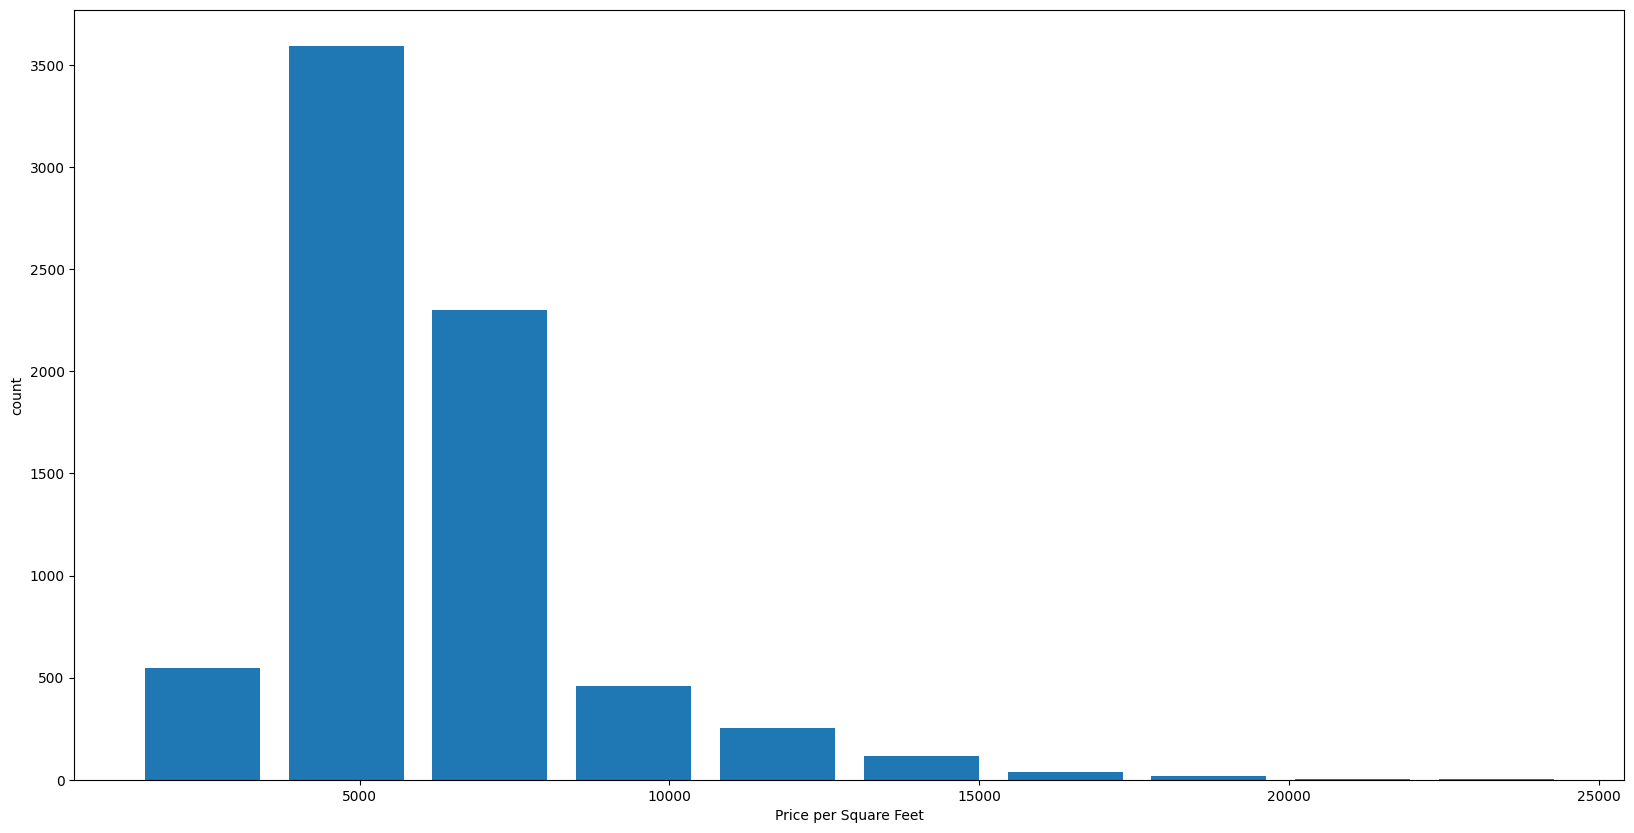

In [50]:
#import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("count")

In [51]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [52]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

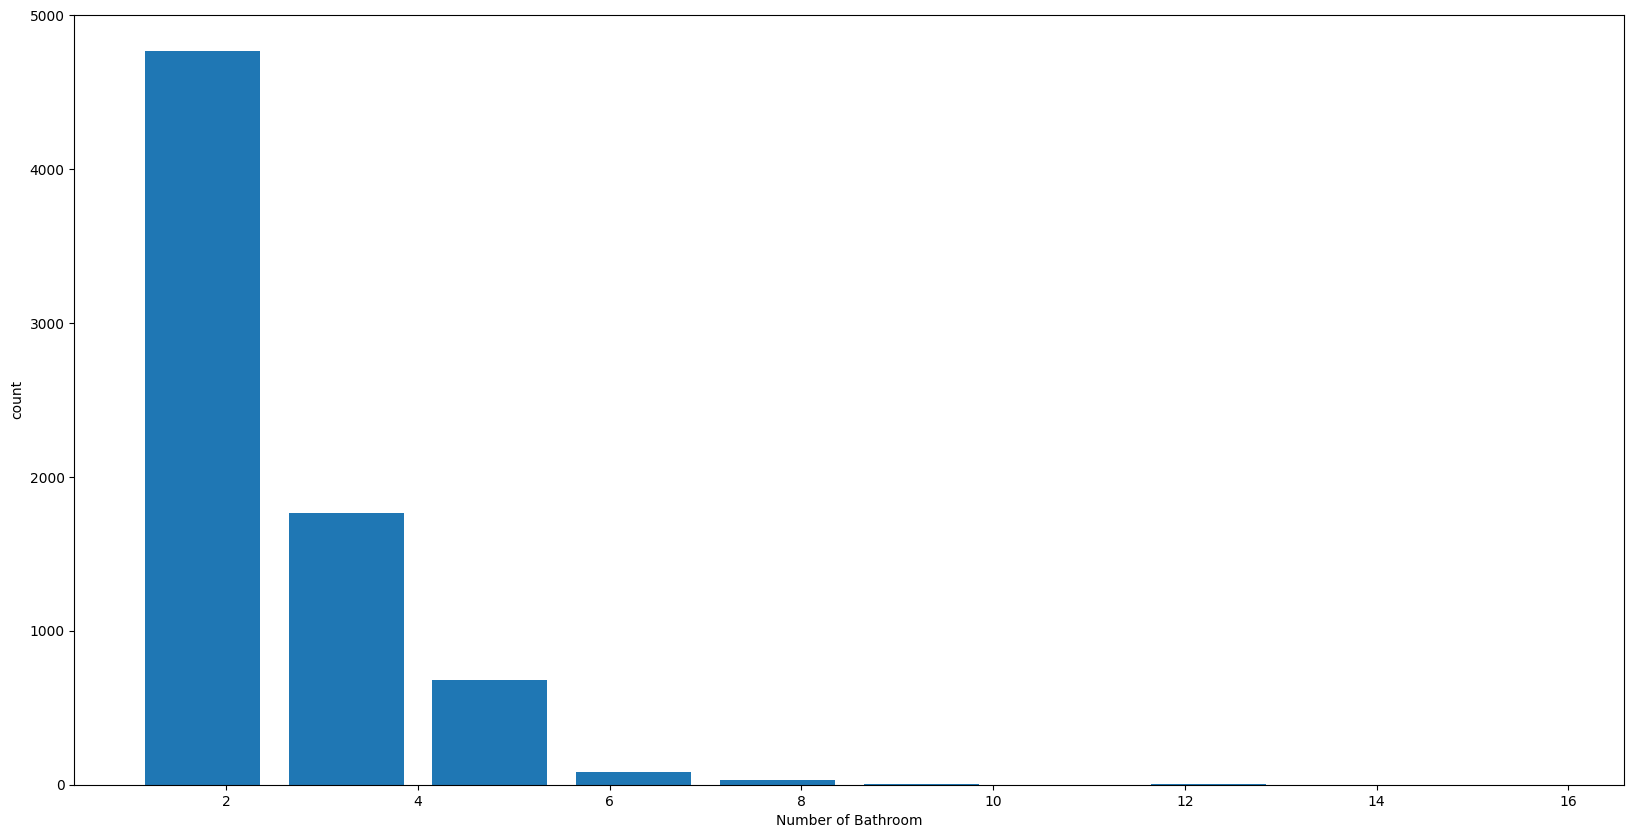

In [53]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of Bathroom")
plt.ylabel("count")

In [54]:
df8[df8.bath>df8.Bedroom+2]

,location,size,total_sqft,bath,price,Bedroom,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [56]:
df9 = df8[df8.bath<df8.Bedroom+2]
df9.shape

(7251, 7)